In [ ]:
# This code is used to extract the wandb run data for different experiment groups
# and store them in pandas DataFrames for further analysis on the disk.
# Use the next cell to start analysis of the stored DataFrames. 

import wandb
from tqdm import tqdm
import pandas as pd
import json

# initialize wandb API
api = wandb.Api()

# Load and filter runs
runs_cls_sb = api.runs(
    path="TeamJPL/ViTRA", 
    filters={"group": "Sweep-SBDataset-classification-final"}
)
runs_seg = api.runs(
    path="TeamJPL/ViTRA", 
    filters={"group": "Sweep-SBDataset-segmentation-final"}
)
runs_FGVG = api.runs(
    path="TeamJPL/ViTRA", 
    filters={"group": "Sweep-FGVCAircraft-classification-final"}
)

# Extract data
def create_wandb_dataframe(runs, desc="Load Runs"):
    data_list = []
    
    for run in tqdm(runs, desc=desc):
        config = json.loads(run.config)  # Config as dict
        row = dict()
        row["seed"] = config["general"]["value"]["seed"]
        row["compression_factor"] = config["optimizer"]["value"]["compression_factor"]
        row["replicator"] = config["optimizer"]["value"]["repl"]

        # Load history
        history_df = run.history(samples=100000) 
        system_df = run.history( samples=100000, stream="system" )
        
        # Store the entire DataFrame in a single cell (!)
        row["history_df"] = history_df
        row["system_df"] = system_df
            
        data_list.append(row)
        
    return pd.DataFrame(data_list)

# Create DataFrames for each experiment group
print("\nCreate DataFrame for Classification SB...")
df_cls_sb = create_wandb_dataframe(runs_cls_sb, desc="CLS SB")

print("\nCreate DataFrame for Segmentation SB...")
df_seg = create_wandb_dataframe(runs_seg, desc="SEG SB")

print("\nCreate DataFrame for FGVG Aircraft...")
df_FGVG = create_wandb_dataframe(runs_FGVG, desc="CLS FGVG")

# 5. Output and verification
print("\n" + "="*30)
print(f"Shape CLS SB: {df_cls_sb.shape}")
print(f"Shape SEG SB: {df_seg.shape}")
print(f"Shape FGVG:   {df_FGVG.shape}")

# Example access:
if not df_seg.empty:
    print("\nExample access to Segmentation DataFrame:")
    first_run = df_seg.iloc[0]
    print(df_seg.head(5))
    print(df_seg.columns)
    
    hist_data = first_run['history_df']
    print(f"Length of history for this run: {len(hist_data)} steps")
    print("First 3 rows of history for this run:")
    print(hist_data.head(3))
    print(hist_data.columns)

    system_data = first_run['system_df']
    print(f"Length of system data for this run: {len(system_data)} steps")
    print("First 3 rows of system data for this run:")
    print(system_data.head(3))
    print(system_data.columns)

df_cls_sb.to_pickle("../results/cls_sb_dataframe.pkl")
df_seg.to_pickle("../results/seg_sb_dataframe.pkl")
df_FGVG.to_pickle("../results/fgvg_dataframe.pkl")

/home/julius/SDU/AdvAI/ViTRA/.venv/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/julius/SDU/AdvAI/ViTRA/.venv/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened bec


Create DataFrame for Classification SB...


KeyboardInterrupt: 

In [2]:
import pandas as pd
# Load dataframes from disk
df_cls_sb_cpy = pd.read_pickle("../results/cls_sb_dataframe.pkl")
df_seg_cpy = pd.read_pickle("../results/seg_sb_dataframe.pkl")
df_fgvg_cpy = pd.read_pickle("../results/fgvg_dataframe.pkl")

In [107]:
df_seg_cpy.head()

,seed,compression_factor,replicator,history_df,system_df
0,20,1,deto-demo,val/mIoU val/recall _step val/bIoU v...,_runtime _timestamp _wandb system....
1,90,2,deto-full,val/ece _timestamp _step val/hd95 ...,_runtime _timestamp _wandb system.g...
2,80,4,deto-full,_runtime epoch lr val/recal...,_runtime _timestamp _wandb system.g...
3,50,32,deto-random,epoch val/ece train/loss train/mIoU ...,_runtime _timestamp _wandb system.g...
4,90,8,deto-demo,val/ece val/mIoU val/bIoU val/dice ...,_runtime _timestamp _wandb system.g...


In [108]:
history_df = df_seg_cpy.iloc[0]['history_df']

In [109]:
history_df.head()

,val/mIoU,val/recall,_step,val/bIoU,val/hd95,epoch,lr,_timestamp,train/mIoU,train/loss,val/ece,val/loss,val/dice,epoch_time,_runtime
0,0.014392,0.050364,0,0.007952,289.476491,1,1.000000e-08,1.769292e+09,0.009563,4.268787,0.635830,4.312511,0.027241,49.601257,70.425458
1,0.074373,0.118516,1,0.028157,237.198593,2,2.008000e-06,1.769292e+09,0.052815,3.064361,0.596185,3.287428,0.095303,47.267002,128.682158
2,0.130850,0.165920,2,0.056288,171.368098,3,4.006000e-06,1.769292e+09,0.085118,1.165777,0.262138,1.546361,0.154795,46.959045,186.259984
3,0.139405,0.168395,3,0.062954,159.896280,4,6.004000e-06,1.769293e+09,0.126019,0.443872,0.054057,1.077696,0.160717,47.103798,244.020879
4,0.198075,0.229274,4,0.074547,148.535526,5,8.002000e-06,1.769293e+09,0.157657,0.355687,0.047489,0.879032,0.244693,46.478760,301.116947


In [110]:
history_df["val/mIoU"].sum()

np.float64(6.836887530051172)

In [111]:
import numpy as np
from scipy import stats

def get_rliable_arrays(df, metric, normalize=False, use_aucl=True):
    """
    Creates numpy arrays for rliable evaluation with shape (n_seeds, 1, n_compression_factors).
    
    Args:
        df: DataFrame containing the run data.
        metric: The metric string to look up in history_df (e.g., 'val/mIoU').
        normalize: If True, normalizes values by the mean of the baseline (deto-full, cf=1).
        use_aucl: If True, calculates Area Under Curve (sum); if False, uses the Maximum value.
    """
    arrays_by_replicator = {}
    target_compression_factors = [2, 4, 8, 16, 32]
    unique_seeds = sorted(df['seed'].unique())
    unique_replicators = sorted(df['replicator'].unique())

    # Calculate performance metric function
    def calc_perf(history_df):
        if use_aucl:
            # Calculate AUCL (Sum over training steps)
            return history_df[metric].sum()
        else:
            # Calculate Maximum (Peak performance)
            return history_df[metric].max()

    # Baseline calculation for normalization
    baseline_iqm = 1.0
    if normalize:
        # Filter for baseline runs: deto-full and compression_factor == 1
        baseline_subset = df[
            (df['replicator'] == 'deto-full') & 
            (df['compression_factor'] == 1)
        ]
    
        # Calculate performance metric for each seed in the baseline configuration
        baseline_vals = []
        for _, row in baseline_subset.iterrows():
            val = calc_perf(row['history_df'])
            baseline_vals.append(val)
        
        # Calculate mean of all baseline values
        baseline_iqm = stats.trim_mean(baseline_vals, proportiontocut=0.25)
        metric_name = "AUCL" if use_aucl else "Max"

    # --- Main Loop ---
    for replicator in unique_replicators:
        data_matrix = []
        
        for seed in unique_seeds:
            row_data = []
            for cf in target_compression_factors:
                subset = df[
                    (df['replicator'] == replicator) & 
                    (df['seed'] == seed) & 
                    (df['compression_factor'] == cf)
                ]
                
                if not subset.empty:
                    history = subset.iloc[0]['history_df']
                    
                    # Calculate performance metric (AUCL or Max)
                    perf_val = calc_perf(history)
                    
                    # Apply normalization
                    if normalize:
                        perf_val = perf_val / baseline_iqm
                        
                    row_data.append(perf_val)
                else:
                    # Fallback for missing runs
                    row_data.append(np.nan)
            
            data_matrix.append(row_data)
        
        # Convert to Numpy Array: (n_seeds, n_compression_factors)
        arr_np = np.array(data_matrix)
        
        # Reshape to target format: (n_seeds, 1, n_compression_factors) (for rliable)
        arr_final = arr_np[:, np.newaxis, :]
        
        arrays_by_replicator[replicator] = arr_final
        
        
    return arrays_by_replicator, baseline_iqm

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import seaborn as sns


def create_rlliable_plot(replicators_aucl_arrays_seg, metric="val/mIoU", use_aucl=True, baseline_iqm=1.0):
    frames = np.array([2, 4, 8, 16, 32])
    algorithms = list(replicators_aucl_arrays_seg.keys())

    # Define metric function
    # rliable expects a function that takes a score array (n_runs, n_tasks, n_frames)
    # and returns the aggregated values (here IQM) per frame (compression factor).
    def iqm_over_factors(scores):
        # scores shape: (n_runs, n_tasks, n_frames) -> (n_seeds, 1, 5)
        # We iterate over the last dimension (the compression factors)
        # and compute the IQM across all runs (seeds)
        return np.array([metrics.aggregate_iqm(scores[..., i]) 
                        for i in range(scores.shape[-1])])

    # Calculation of Interval Estimates (IQM Scores and CIs)
    # This calculates the IQM and the 95% Stratified Bootstrap Confidence Intervals
    print("Calculating Stratified Bootstrap CIs (reps=50000)...")
    iqm_scores, iqm_cis = rly.get_interval_estimates(
        replicators_aucl_arrays_seg, 
        iqm_over_factors, 
        reps=50000  # Recommended for final plots, 2000 is sufficient for tests
    )
    palette = sns.color_palette('colorblind', n_colors=len(algorithms))
    algorithm_colors = dict(zip(algorithms, palette))

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))

    ylabel_metric = "AUCL" if use_aucl else "Max"

    # Use the standard plot function for curves
    plot_utils.plot_sample_efficiency_curve(
        frames, 
        iqm_scores, 
        iqm_cis, 
        algorithms=algorithms,
        colors=algorithm_colors,
        xlabel='Compression Factor',
        ylabel=f'Normalized {ylabel_metric} {metric} (IQM)',
        ax=ax
    )

    label_mapping = {"deto-full": "DiLoCo", "deto-demo": "DeMo", "deto-random": "Random"}
    patches = [mpatches.Patch(color=algorithm_colors[alg], label=label_mapping.get(alg, alg)) for alg in algorithms]

    # Legende zum Plot hinzufügen
    ax.legend(handles=patches, loc='best', title="Replicator")

    # Optional: Logarithmic scale for the x-axis, since CFs are powers of 2
    ax.set_xscale('log')
    ax.set_xticks(frames)
    ax.set_xticklabels(frames)
    ax.minorticks_off() # No minor ticks needed for log scale here

    plt.title(f'Performance vs Compression Factor (IQM with 95% CIs)\n normalized by Baseline {ylabel_metric} {metric}: {baseline_iqm:.3f}')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.savefig(f'../results/performance_vs_compression_{metric.replace("/", "_")}_{"aucl" if use_aucl else "max"}.png', dpi=300)
    plt.show()
    

Calculating Stratified Bootstrap CIs (reps=50000)...


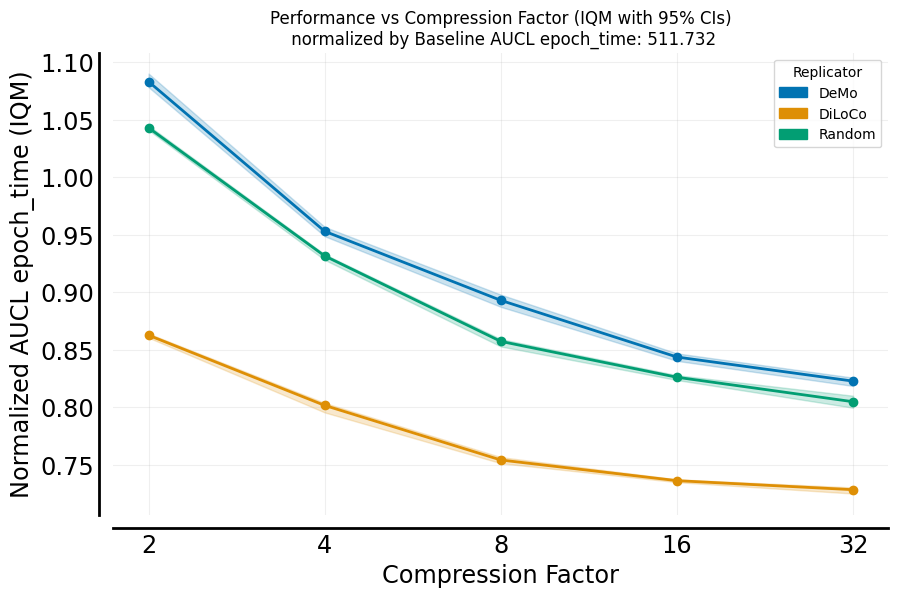

Calculating Stratified Bootstrap CIs (reps=50000)...


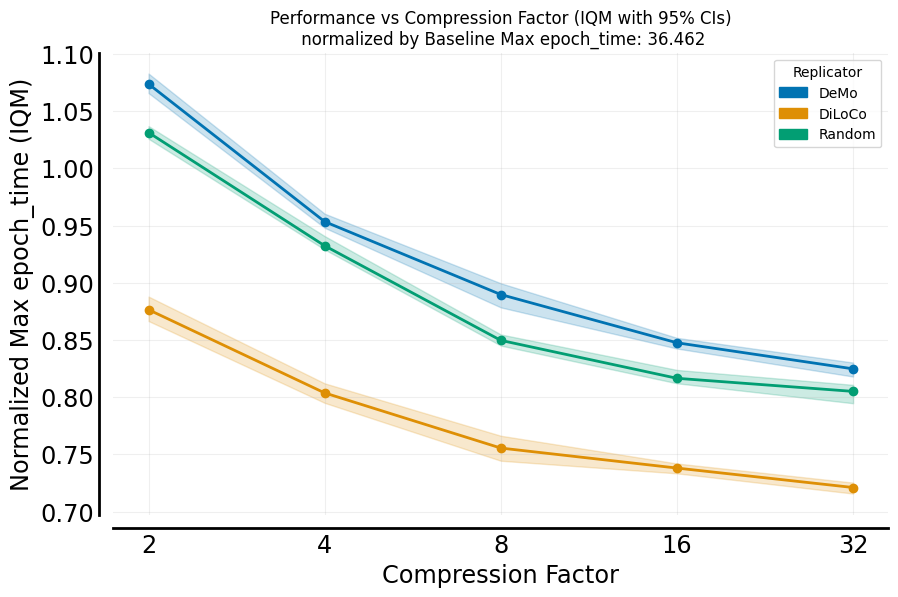

Calculating Stratified Bootstrap CIs (reps=50000)...


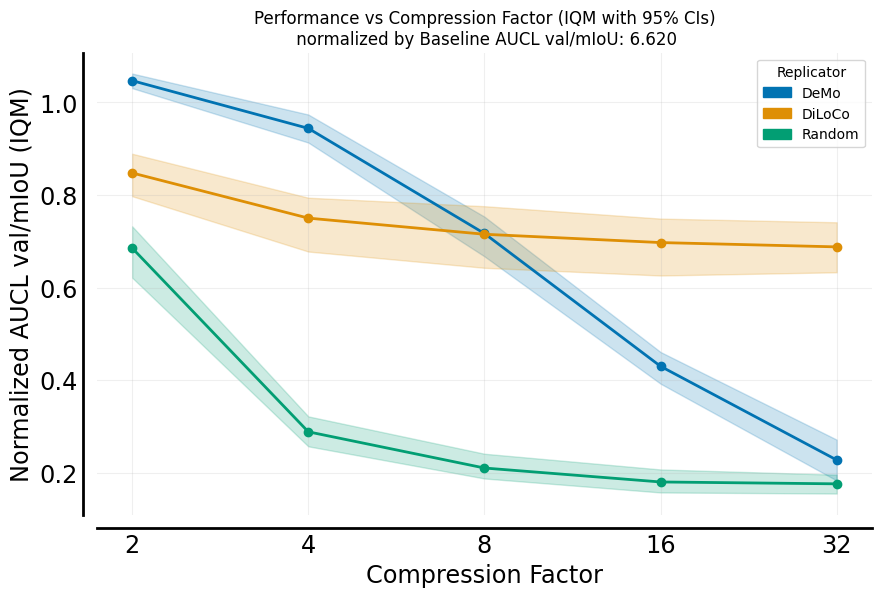

Calculating Stratified Bootstrap CIs (reps=50000)...


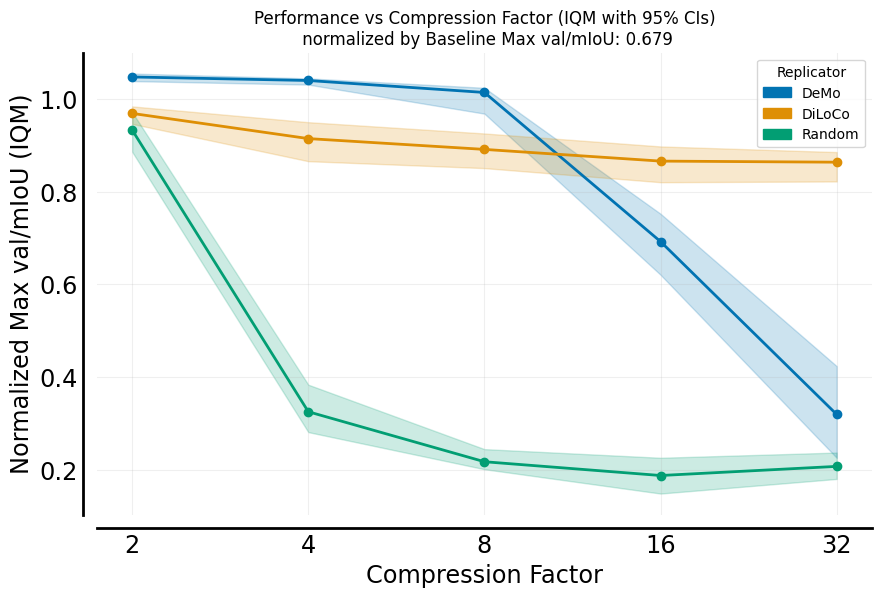

Calculating Stratified Bootstrap CIs (reps=50000)...


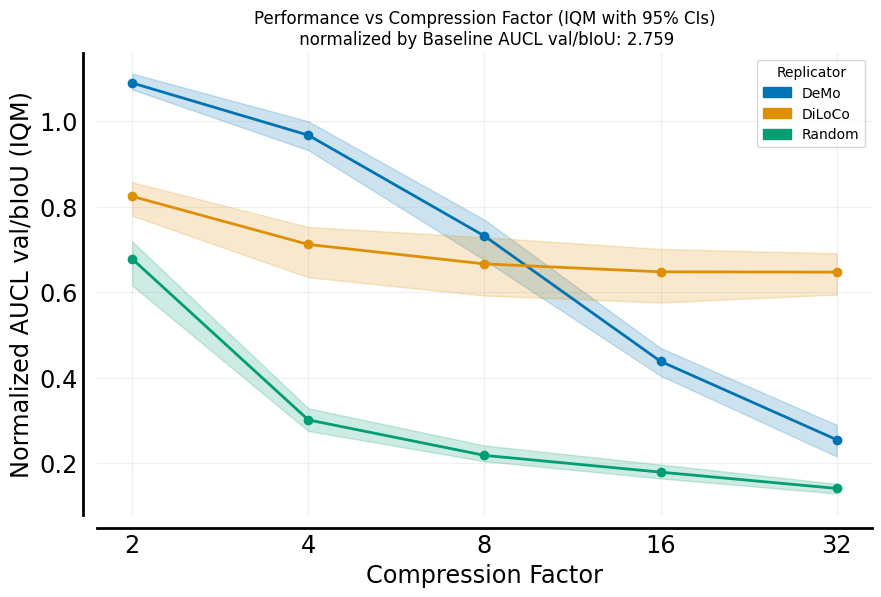

Calculating Stratified Bootstrap CIs (reps=50000)...


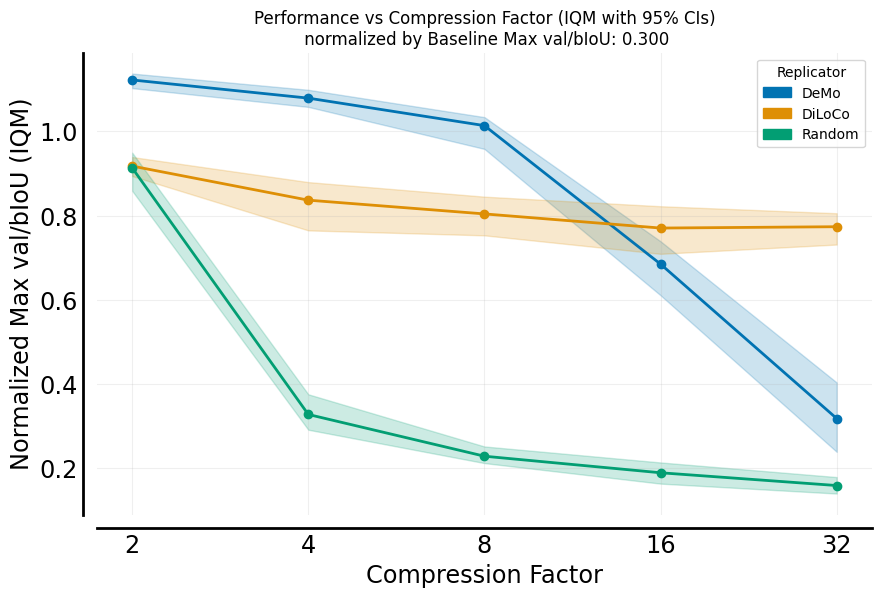

In [113]:
# Visualizations segmentation
metric_seg = ("epoch_time","val/mIoU","val/bIoU")
aucl_options = [True, False]
for metric in metric_seg:
    for use_aucl in aucl_options:
        replicators_aucl_arrays_seg, baseline_iqm = get_rliable_arrays(df_seg_cpy, metric=metric, normalize=True, use_aucl=use_aucl)
        create_rlliable_plot(replicators_aucl_arrays_seg, metric=metric, use_aucl=use_aucl, baseline_iqm=baseline_iqm)

Calculating Stratified Bootstrap CIs (reps=50000)...


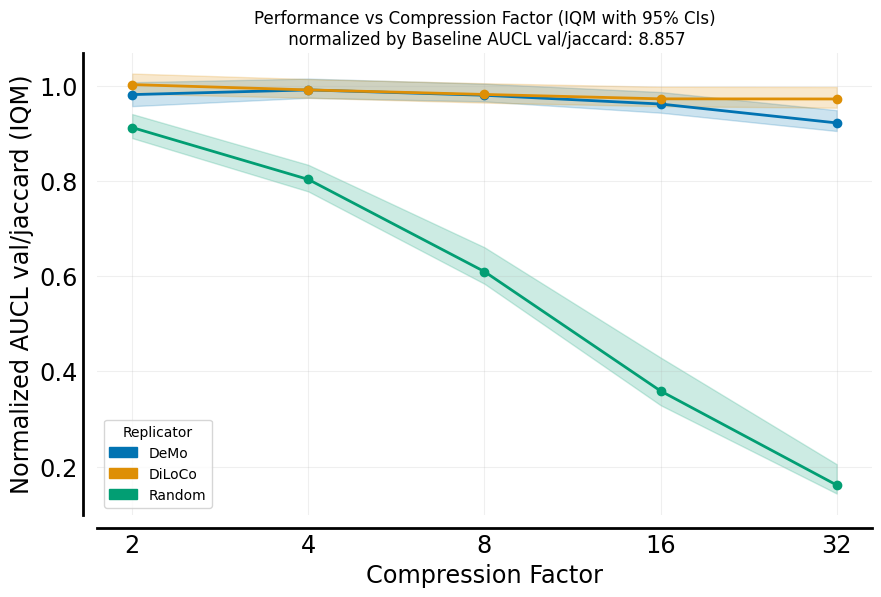

Calculating Stratified Bootstrap CIs (reps=50000)...


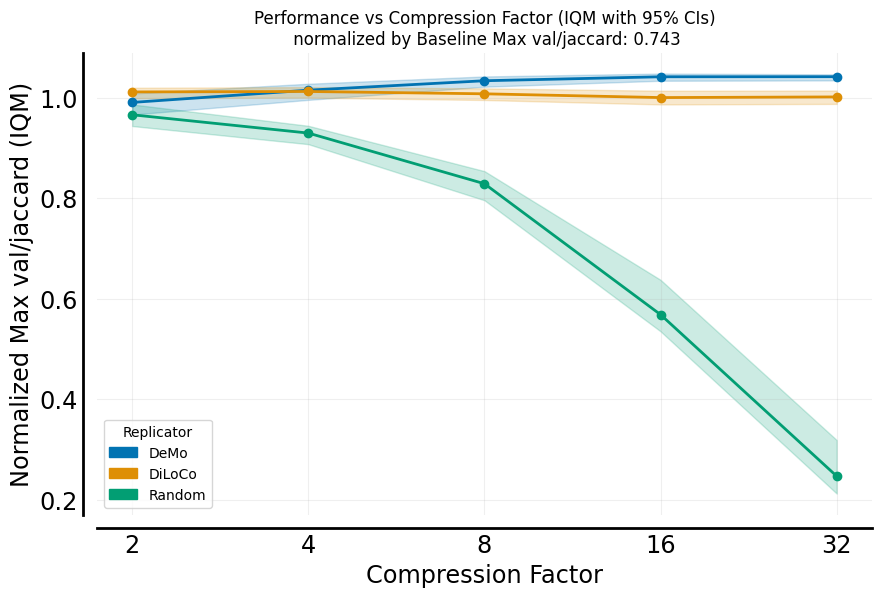

Calculating Stratified Bootstrap CIs (reps=50000)...


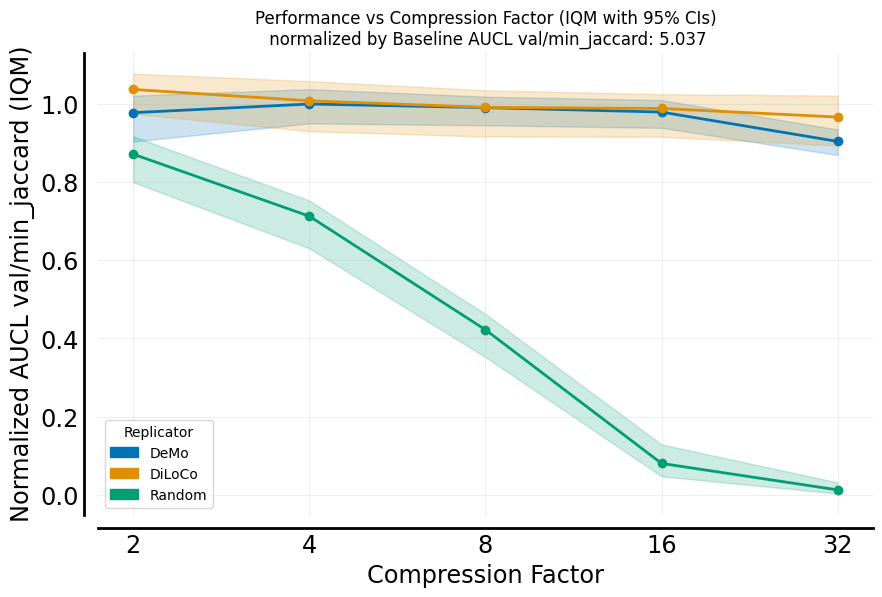

Calculating Stratified Bootstrap CIs (reps=50000)...


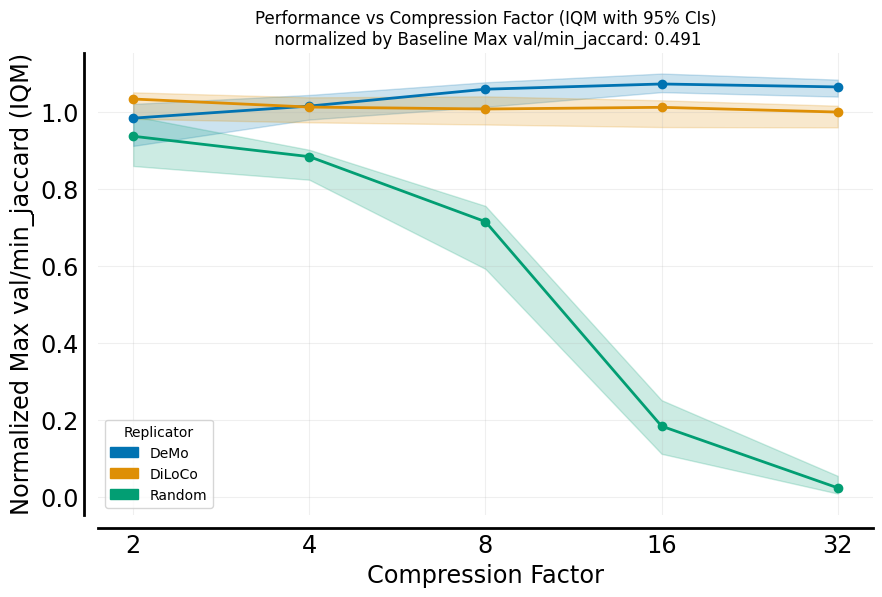

In [114]:
# Visualizations mutli-label classification
metric_multi_cls = ("val/jaccard","val/min_jaccard")
aucl_options = [True, False]
for metric in metric_multi_cls:
    for use_aucl in aucl_options:
        replicators_aucl_arrays_seg, baseline_iqm = get_rliable_arrays(df_cls_sb_cpy, metric=metric, normalize=True, use_aucl=use_aucl)
        create_rlliable_plot(replicators_aucl_arrays_seg, metric=metric, use_aucl=use_aucl, baseline_iqm=baseline_iqm)

Calculating Stratified Bootstrap CIs (reps=50000)...


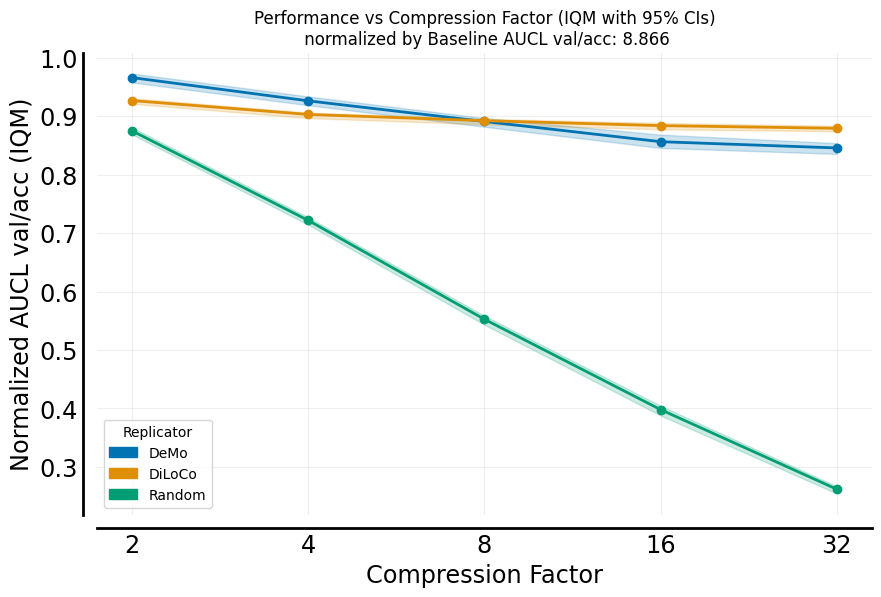

Calculating Stratified Bootstrap CIs (reps=50000)...


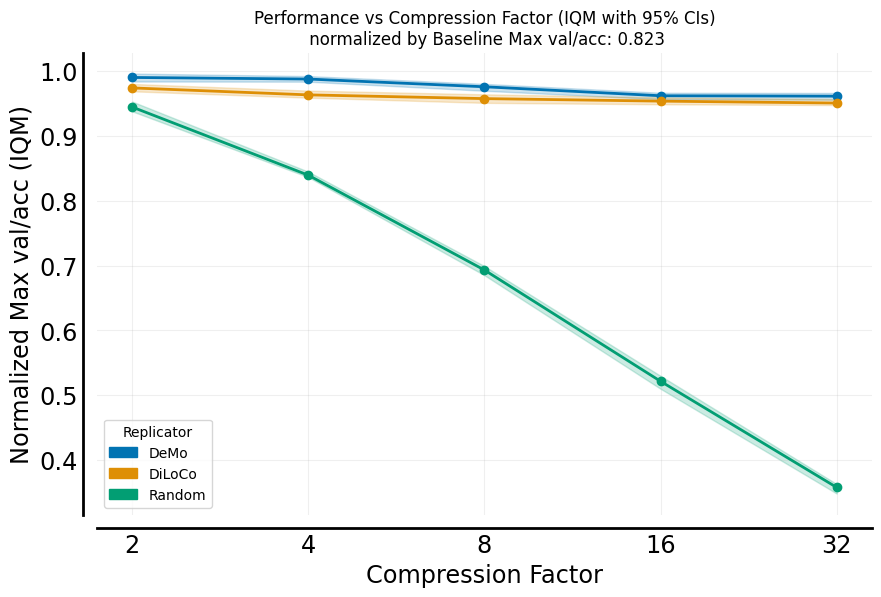

Calculating Stratified Bootstrap CIs (reps=50000)...


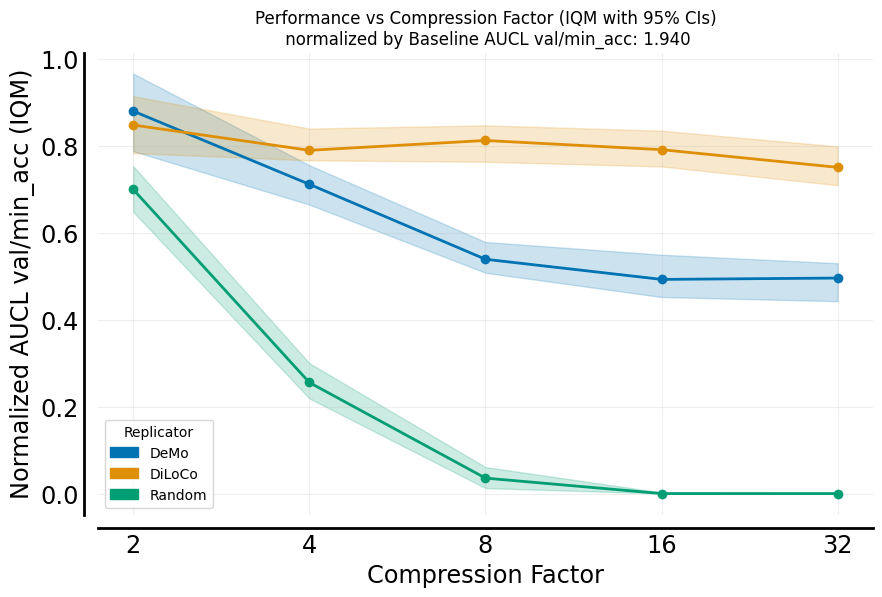

Calculating Stratified Bootstrap CIs (reps=50000)...


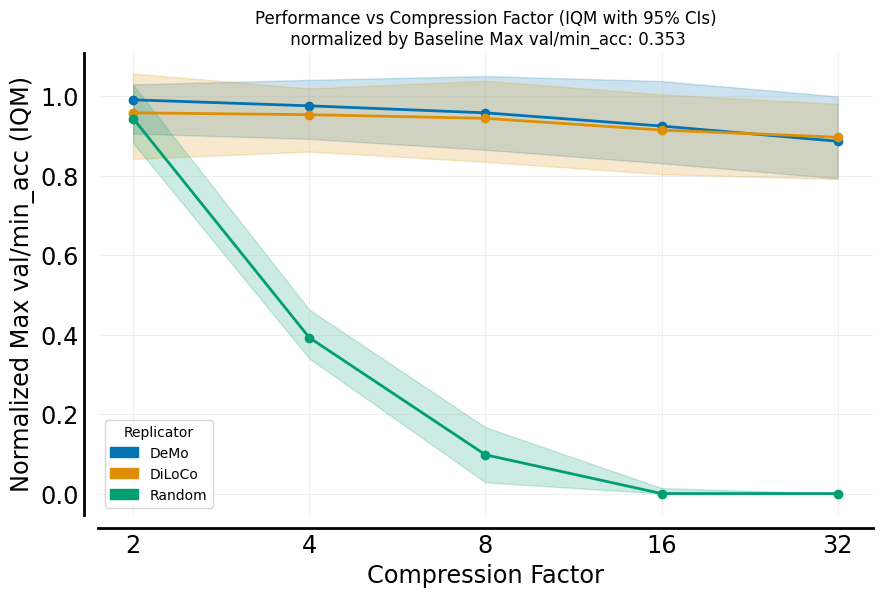

In [115]:
# Visualizations mutli-class classification
metric_multi_cls = ("val/acc","val/min_acc")
aucl_options = [True, False]
for metric in metric_multi_cls:
    for use_aucl in aucl_options:
        replicators_aucl_arrays_seg, baseline_iqm = get_rliable_arrays(df_fgvg_cpy, metric=metric, normalize=True, use_aucl=use_aucl)
        create_rlliable_plot(replicators_aucl_arrays_seg, metric=metric, use_aucl=use_aucl, baseline_iqm=baseline_iqm)

In [116]:
import numpy as np

def get_time_arrays(df, metric="epoch_time"):
    """
    Extracts the epoch_time (mean per run) in rliable format.
    Shape: (n_seeds, 1, n_compression_factors)
    """
    arrays_by_replicator = {}
    target_compression_factors = [2, 4, 8, 16, 32]
    unique_seeds = sorted(df['seed'].unique())
    unique_replicators = sorted(df['replicator'].unique())

    for replicator in unique_replicators:
        data_matrix = []
        for seed in unique_seeds:
            row_data = []
            for cf in target_compression_factors:
                subset = df[
                    (df['replicator'] == replicator) & 
                    (df['seed'] == seed) & 
                    (df['compression_factor'] == cf)
                ]
                
                if not subset.empty:
                    history = subset.iloc[0]['history_df']
                    # We take the IQM of the metric of a run
                    val = metrics.aggregate_iqm(history[metric].values)
                    row_data.append(val)
                else:
                    row_data.append(np.nan)
            data_matrix.append(row_data)
        
        # Reshape to (n_seeds, 1, n_factors)
        arr_np = np.array(data_matrix)
        arr_final = arr_np[:, np.newaxis, :]
        arrays_by_replicator[replicator] = arr_final
        
    return arrays_by_replicator


def get_network_arrays(df, metric_sent="system.network.sent", metric_recv="system.network.recv"):
    """
    Extracts the network traffic (total sent + received per run) in GB in rliable format.
    Shape: (n_seeds, 1, n_compression_factors)
    """
    arrays_by_replicator = {}
    target_compression_factors = [2, 4, 8, 16, 32]
    unique_seeds = sorted(df['seed'].unique())
    unique_replicators = sorted(df['replicator'].unique())

    for replicator in unique_replicators:
        data_matrix = []
        for seed in unique_seeds:
            row_data = []
            for cf in target_compression_factors:
                subset = df[
                    (df['replicator'] == replicator) & 
                    (df['seed'] == seed) & 
                    (df['compression_factor'] == cf)
                ]
                
                if not subset.empty:
                    system = subset.iloc[0]['system_df']
                    try:
                        # Calculate total traffic (sent + recv)
                        sent = system[metric_sent].dropna()
                        recv = system[metric_recv].dropna()
                        
                        val = 0.0
                        has_data = False
                        if not sent.empty:
                            val += (sent.max() - sent.min())
                            has_data = True
                        if not recv.empty:
                            val += (recv.max() - recv.min())
                            has_data = True
                            
                        if has_data:
                            # Convert to GB
                            val = val / 1e9
                        else:
                            val = np.nan
                    except KeyError:
                        val = np.nan
                    
                    row_data.append(val)
                else:
                    row_data.append(np.nan)
            data_matrix.append(row_data)
        
        # Reshape to (n_seeds, 1, n_factors)
        arr_np = np.array(data_matrix)
        arr_final = arr_np[:, np.newaxis, :]
        arrays_by_replicator[replicator] = arr_final
        
    return arrays_by_replicator

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from rliable import metrics
import matplotlib.lines as mlines

def create_pareto_plot(perf_dict, x_dict, y_label, x_label="IQM Epoch Time (s)", title="Pareto Plot: Performance vs Time"):
    """
    Create a Pareto plot.
    
    Args:
        perf_dict: Dictionary with performance data (Y-axis) in rliable format.
        x_dict: Dictionary with x-axis data (Time or Network) in rliable format.
        y_label: Label for the Y-axis.
        x_label: Label for the X-axis.
        title: Title of the plot.
    """
    # Font sizes from rliable
    SIZE_AXIS_LABEL = 'xx-large'
    SIZE_TICK_LABEL = 'xx-large'
    SIZE_TITLE      = 'xx-large'
    SIZE_LEGEND     = 'x-large'
    algorithms = list(perf_dict.keys())
    compression_factors = [2, 4, 8, 16, 32]
    
    # Define colors (consistent with rliable)
    palette = sns.color_palette('colorblind', n_colors=len(algorithms))
    algorithm_colors = dict(zip(algorithms, palette))
    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # For the legend, we collect handles
    legend_handles = []
    
    # Plot data points
    for alg in algorithms:
        color = algorithm_colors[alg]
        
        # Extract data
        scores_y = perf_dict[alg] # Shape: (seeds, 1, factors)
        scores_x = x_dict[alg] 
        
        # Iterate through the Compression Factors
        # scores_y has shape (seeds, 1, 5). We want IQM over the seeds (axis 0)
        # for each factor (axis 2).
        
        prev_x, prev_y = None, None
        
        for i, cf in enumerate(compression_factors):
            # Extract data for this specific factor (all seeds)
            y_data = scores_y[:, 0, i]
            x_data = scores_x[:, 0, i]
            
            # Calculate IQM
            iqm_y = metrics.aggregate_iqm(y_data)
            iqm_x = metrics.aggregate_iqm(x_data)
            
            # Scatter Plot
            # Scale the size of the points based on the Compression Factor
            size = cf * 15  
            
            ax.scatter(iqm_x, -iqm_y, s=size, color=color, alpha=0.8, edgecolors='w', linewidth=0.5)
            
            # Draw connecting lines between factors of an algorithm
            if i > 0 and prev_x is not None:
               ax.plot([prev_x, iqm_x], [-prev_y, -iqm_y], color=color, alpha=0.3, linestyle='--')
            
            prev_x, prev_y = iqm_x, iqm_y

    # Legend for Replicators (Color)
    label_mapping = {"deto-full": "DiLoCo", "deto-demo": "DeMo", "deto-random": "Random"}
    for alg in algorithms:
        legend_handles.append(mlines.Line2D([], [], color=algorithm_colors[alg], marker='o', 
                                          linestyle='None', markersize=8, label=label_mapping.get(alg, alg)))
    
    # Legend for Compression Factors (Size) - display separately
    # We create "dummy" points for the size legend
    size_legend_handles = []
    for cf in compression_factors:
        size_legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', 
                                               linestyle='None', markersize=np.sqrt(cf * 15), 
                                               label=f'{cf}', alpha=0.6))

    # Legend block (Replicators)
    first_legend = ax.legend(handles=legend_handles, title="Replicator", loc='lower right', bbox_to_anchor=(1, 0.2), fontsize=SIZE_LEGEND, title_fontsize=SIZE_LEGEND)
    ax.add_artist(first_legend) # Important to prevent the second legend from overwriting the first
    
    # Legend block (Compression Factors)
    ax.legend(handles=size_legend_handles, title="Compression factor", loc='upper right', labelspacing=1.2, fontsize=SIZE_LEGEND, title_fontsize=SIZE_LEGEND,
              )

    # Axes and labels
    ax.set_xlabel(x_label, fontsize=SIZE_AXIS_LABEL)
    ax.set_ylabel(y_label, fontsize=SIZE_AXIS_LABEL)
    ax.set_title(title, fontsize=SIZE_TITLE)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICK_LABEL)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    plt.tight_layout()
    
    # Generate filename based on labels
    safe_y = y_label.replace("/", "_").lower()
    safe_x = x_label.replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").lower()
    plt.savefig(f'../results/pareto_plot_{safe_y}_vs_{safe_x}.png', dpi=300)
    plt.show()
    

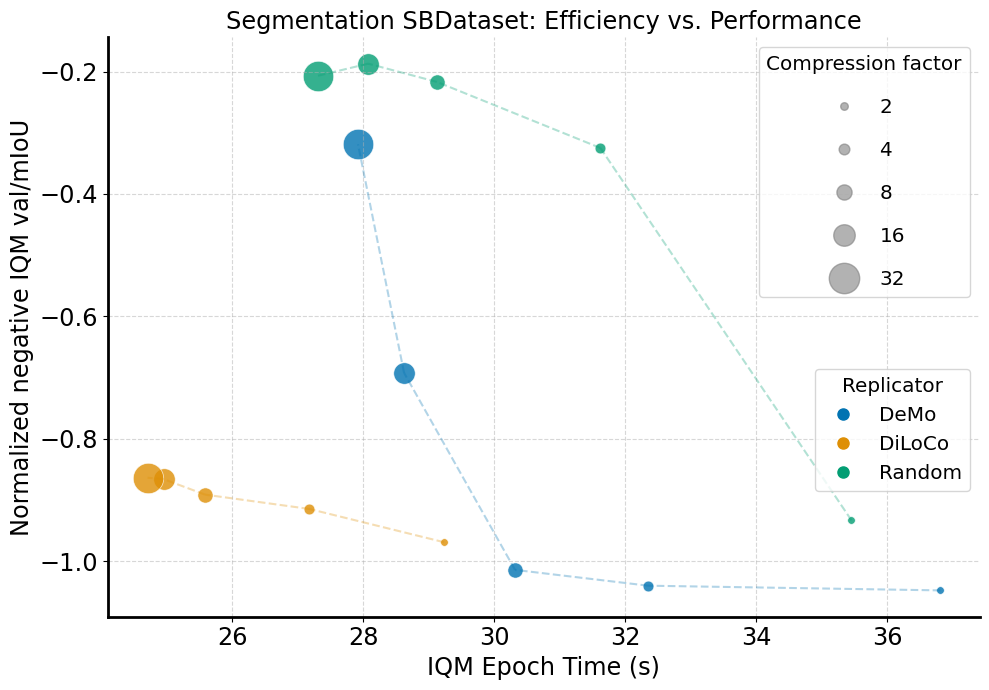

In [118]:
arrays_seg_aucl, baseline_iqm = get_rliable_arrays(df_seg_cpy, "val/mIoU", normalize=True, use_aucl=False)

arrays_seg_time = get_time_arrays(df_seg_cpy, metric="epoch_time")

create_pareto_plot(
    perf_dict=arrays_seg_aucl, 
    x_dict=arrays_seg_time, 
    y_label="Normalized negative IQM val/mIoU",
    title="Segmentation SBDataset: Efficiency vs. Performance"
)

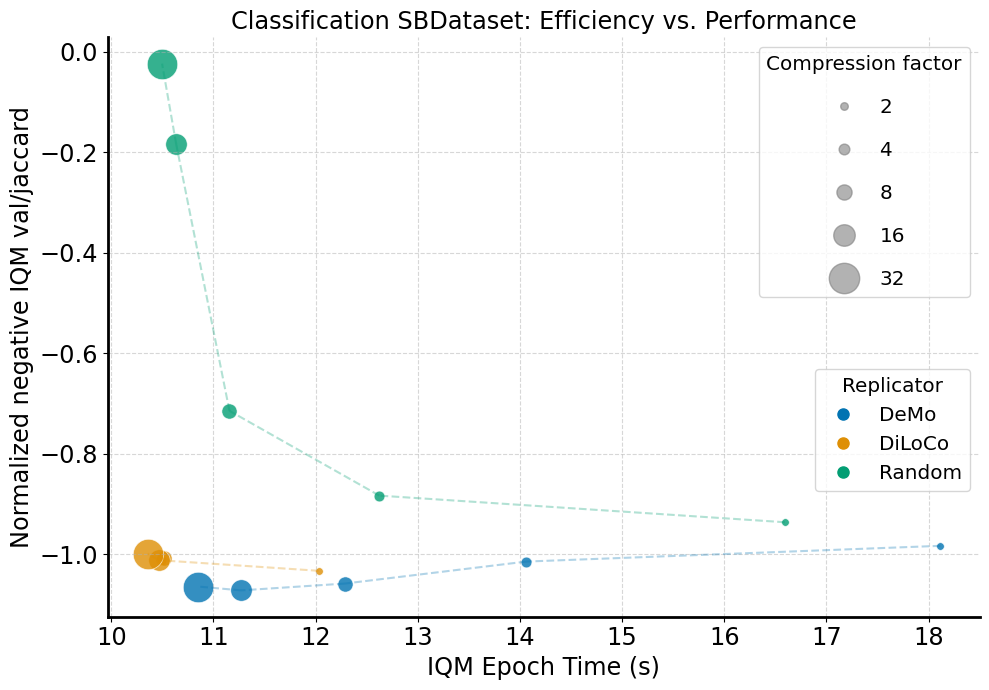

In [119]:
arrays_seg_aucl, baseline_iqm = get_rliable_arrays(df_cls_sb_cpy, "val/min_jaccard", normalize=True, use_aucl=False)

arrays_seg_time = get_time_arrays(df_cls_sb_cpy, metric="epoch_time")

create_pareto_plot(
    perf_dict=arrays_seg_aucl, 
    x_dict=arrays_seg_time, 
    y_label="Normalized negative IQM val/jaccard",
    title="Classification SBDataset: Efficiency vs. Performance"
)

In [120]:
#TODO: Sample efficiency plot über epochen (für Anhang) und variantionen des pareto plots

In [121]:
df_seg_cpy["system_df"].iloc[0].head()

,_runtime,_timestamp,_wandb,system.gpu.0.correctedMemoryErrors,system.gpu.0.enforcedPowerLimitWatts,system.gpu.0.gpu,system.gpu.0.memory,system.gpu.0.memoryAllocated,system.gpu.0.memoryAllocatedBytes,system.gpu.0.memoryClock,...,system.disk./.usagePercent,system.disk.nvme0n1.in,system.disk.nvme0n1.out,system.memory_percent,system.network.recv,system.network.sent,system.proc.cpu.threads,system.proc.memory.availableMB,system.proc.memory.percent,system.proc.memory.rssMB
0,15.296550,1.769292e+09,True,0.0,250.0,100.0,5.0,26.403351,1.134015e+10,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.305649,1.769292e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.188246,0.0,0.003906,4.020888,6.549683e+09,6.549687e+09,48.0,1.980995e+06,0.116021,2394.660156
2,30.297532,1.769292e+09,True,0.0,250.0,100.0,5.0,26.403351,1.134015e+10,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.299493,1.769292e+09,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.188246,0.0,0.449219,4.019240,1.502633e+10,1.502539e+10,48.0,1.981029e+06,0.116026,2394.750000
4,45.295989,1.769292e+09,True,0.0,250.0,76.0,14.0,26.403351,1.134015e+10,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


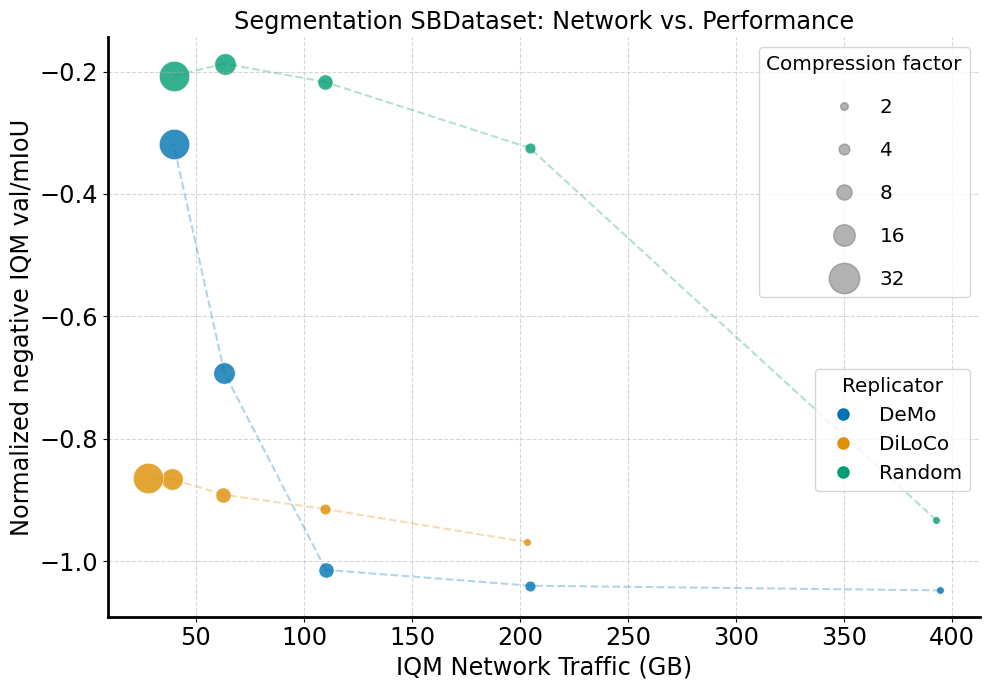

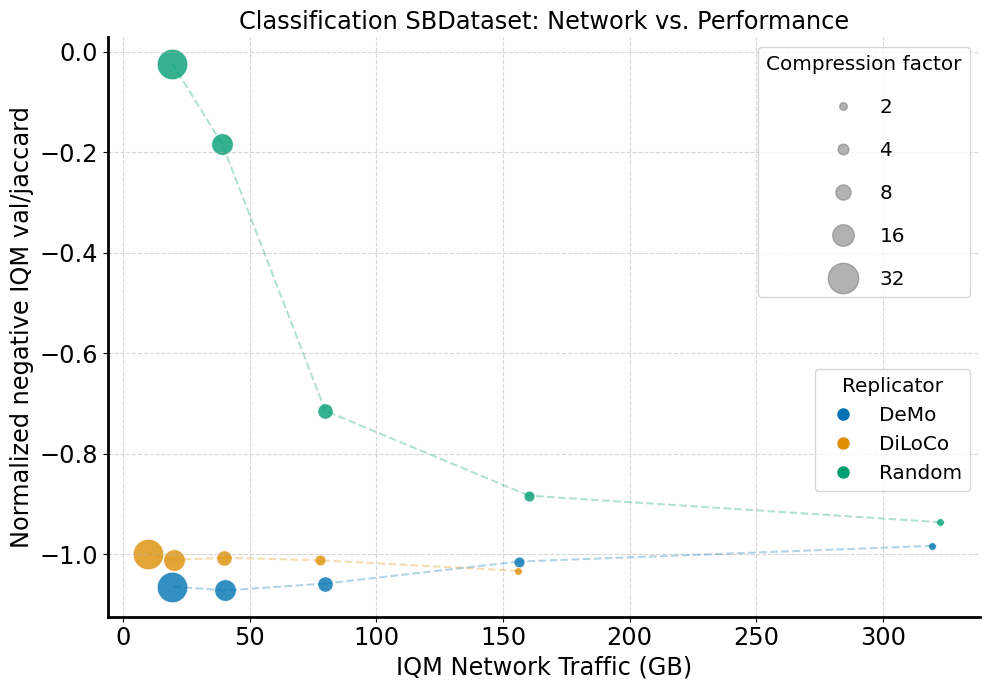

In [122]:
# Segmentation
arrays_seg_aucl, baseline_iqm = get_rliable_arrays(df_seg_cpy, "val/mIoU", normalize=True, use_aucl=False)
arrays_seg_net = get_network_arrays(df_seg_cpy)

create_pareto_plot(
    perf_dict=arrays_seg_aucl, 
    x_dict=arrays_seg_net, 
    y_label="Normalized negative IQM val/mIoU",
    x_label="IQM Network Traffic (GB)",
    title="Segmentation SBDataset: Network vs. Performance"
)

# Classification
arrays_cls_aucl, baseline_iqm = get_rliable_arrays(df_cls_sb_cpy, "val/min_jaccard", normalize=True, use_aucl=False)
arrays_cls_net = get_network_arrays(df_cls_sb_cpy)

create_pareto_plot(
    perf_dict=arrays_cls_aucl, 
    x_dict=arrays_cls_net, 
    y_label="Normalized negative IQM val/jaccard",
    x_label="IQM Network Traffic (GB)",
    title="Classification SBDataset: Network vs. Performance"
)